# This is a code made by the AutoML model named AutoGluon ([1]“autogluon/autogluon,” GitHub, Feb. 14, 2023. https://github.com/autogluon/autogluon): an automl framework to predict different types of machine learning problems.

# Author: Abdullah Moosa 29/10/2024

## Installation and setup

In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install autogluon

  Using cached autogluon-1.1.1-py3-none-any.whl.metadata (11 kB)
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 88.8 MB/s eta 0:00:00


In [9]:
!pip uninstall torchaudio torchvision --yes

Found existing installation: torchaudio 2.5.0+cu121
Uninstalling torchaudio-2.5.0+cu121:
  Successfully uninstalled torchaudio-2.5.0+cu121
Found existing installation: torchvision 0.18.1
Uninstalling torchvision-0.18.1:
  Successfully uninstalled torchvision-0.18.1


In [6]:
import os
import warnings

import numpy as np

warnings.filterwarnings('ignore')
np.random.seed(123)

In [4]:
!pip install torchvision

## Importing the dataset

In [20]:
import pandas as pd
file_path = '/content/gdrive/MyDrive/survey lung cancer.csv'
df = pd.read_csv(file_path)
df.head

<bound method NDFrame.head of     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2         2         1                  1   
2                  1         2         1         2                  1   
3                  1         1         1         1                  2   
4                  1         1         1         2                  1   
..               ...       ...       ...       ...                ...   
304                2         2         1         1                  2   
305                1         2         2         2                  2   
306                1         1         2         2                  2   
307                1         2         2         1                  2   
308                1         2         2         2                  2   

     COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
0           2                    2                      2           2   
1           1                    2                      2           2   
2           2                    2                      1           2   
3           1                    1                      2           2   
4           2                    2                      1           1   
..        ...                  ...                    ...         ...   
304         2                    2                      2           1   
305         2                    2                      1           2   
306         2                    1                      1           2   
307         2                    2                      1           2   
308         1                    1                      2           1   

    LUNG_CANCER  
0           YES  
1           YES  
2            NO  
3            NO  
4            NO  
..          ...  
304         YES  
305         YES  
306         YES  
307         YES  
308         YES  

[309 rows x 16 columns]>

In [21]:
label_col = 'LUNG_CANCER'
train_data = pd.read_csv(file_path, index_col=0)
test_data = pd.read_csv(file_path, index_col=0)

##using the autogluon framework to start the training

In [22]:
from autogluon.multimodal import MultiModalPredictor

predictor = MultiModalPredictor(label=label_col).fit(
    train_data=train_data,
    time_limit=120
)

No path specified. Models will be saved in: "AutogluonModels/ag-20241030_230413"
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Pytorch Version:    2.3.1+cu121
CUDA Version:       12.1
Memory Avail:       9.31 GB / 12.67 GB (73.5%)
Disk Space Avail:   70.97 GB / 112.64 GB (63.0%)
AutoGluon infers your prediction problem is: 'binary' (because only two unique label-values observed).
	2 unique label values:  ['YES', 'NO']
	If 'binary' is not the correct problem_type, please manually specify the problem_type parameter during Predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression', 'quantile'])

AutoMM starts to create your model. ✨✨✨

To track the learning progress, you can open a terminal and launch Tensorboard:
    ```shell
    # Assume you have in

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 1: 'val_roc_auc' reached 0.69676 (best 0.69676), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=0-step=1.ckpt' as top 3
INFO: Epoch 0, global step 1: 'val_roc_auc' reached 0.69676 (best 0.69676), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=0-step=1.ckpt' as top 3
INFO: Epoch 0, global step 1: 'val_roc_auc' reached 0.69676 (best 0.69676), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=0-step=1.ckpt' as top 3
INFO: Epoch 0, global step 1: 'val_roc_auc' reached 0.69676 (best 0.69676), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=0-step=1.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 1, global step 2: 'val_roc_auc' reached 0.87269 (best 0.87269), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=1-step=2.ckpt' as top 3
INFO: Epoch 1, global step 2: 'val_roc_auc' reached 0.87269 (best 0.87269), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=1-step=2.ckpt' as top 3
INFO: Epoch 1, global step 2: 'val_roc_auc' reached 0.87269 (best 0.87269), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=1-step=2.ckpt' as top 3
INFO: Epoch 1, global step 2: 'val_roc_auc' reached 0.87269 (best 0.87269), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=1-step=2.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 1, global step 3: 'val_roc_auc' reached 0.94907 (best 0.94907), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=1-step=3.ckpt' as top 3
INFO: Epoch 1, global step 3: 'val_roc_auc' reached 0.94907 (best 0.94907), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=1-step=3.ckpt' as top 3
INFO: Epoch 1, global step 3: 'val_roc_auc' reached 0.94907 (best 0.94907), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=1-step=3.ckpt' as top 3
INFO: Epoch 1, global step 3: 'val_roc_auc' reached 0.94907 (best 0.94907), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=1-step=3.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 2, global step 4: 'val_roc_auc' reached 0.95139 (best 0.95139), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=2-step=4.ckpt' as top 3
INFO: Epoch 2, global step 4: 'val_roc_auc' reached 0.95139 (best 0.95139), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=2-step=4.ckpt' as top 3
INFO: Epoch 2, global step 4: 'val_roc_auc' reached 0.95139 (best 0.95139), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=2-step=4.ckpt' as top 3
INFO: Epoch 2, global step 4: 'val_roc_auc' reached 0.95139 (best 0.95139), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=2-step=4.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 2, global step 5: 'val_roc_auc' reached 0.94907 (best 0.95139), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=2-step=5.ckpt' as top 3
INFO: Epoch 2, global step 5: 'val_roc_auc' reached 0.94907 (best 0.95139), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=2-step=5.ckpt' as top 3
INFO: Epoch 2, global step 5: 'val_roc_auc' reached 0.94907 (best 0.95139), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=2-step=5.ckpt' as top 3
INFO: Epoch 2, global step 5: 'val_roc_auc' reached 0.94907 (best 0.95139), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=2-step=5.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 3, global step 6: 'val_roc_auc' reached 0.94907 (best 0.95139), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=3-step=6.ckpt' as top 3
INFO: Epoch 3, global step 6: 'val_roc_auc' reached 0.94907 (best 0.95139), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=3-step=6.ckpt' as top 3
INFO: Epoch 3, global step 6: 'val_roc_auc' reached 0.94907 (best 0.95139), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=3-step=6.ckpt' as top 3
INFO: Epoch 3, global step 6: 'val_roc_auc' reached 0.94907 (best 0.95139), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=3-step=6.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 3, global step 7: 'val_roc_auc' reached 0.95139 (best 0.95139), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=3-step=7.ckpt' as top 3
INFO: Epoch 3, global step 7: 'val_roc_auc' reached 0.95139 (best 0.95139), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=3-step=7.ckpt' as top 3
INFO: Epoch 3, global step 7: 'val_roc_auc' reached 0.95139 (best 0.95139), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=3-step=7.ckpt' as top 3
INFO: Epoch 3, global step 7: 'val_roc_auc' reached 0.95139 (best 0.95139), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=3-step=7.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 4, global step 8: 'val_roc_auc' was not in top 3
INFO: Epoch 4, global step 8: 'val_roc_auc' was not in top 3
INFO: Epoch 4, global step 8: 'val_roc_auc' was not in top 3
INFO: Epoch 4, global step 8: 'val_roc_auc' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 4, global step 9: 'val_roc_auc' reached 0.95139 (best 0.95139), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=4-step=9.ckpt' as top 3
INFO: Epoch 4, global step 9: 'val_roc_auc' reached 0.95139 (best 0.95139), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=4-step=9.ckpt' as top 3
INFO: Epoch 4, global step 9: 'val_roc_auc' reached 0.95139 (best 0.95139), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=4-step=9.ckpt' as top 3
INFO: Epoch 4, global step 9: 'val_roc_auc' reached 0.95139 (best 0.95139), saving model to '/content/AutogluonModels/ag-20241030_230413/epoch=4-step=9.ckpt' as top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 5, global step 10: 'val_roc_auc' was not in top 3
INFO: Epoch 5, global step 10: 'val_roc_auc' was not in top 3
INFO: Epoch 5, global step 10: 'val_roc_auc' was not in top 3
INFO: Epoch 5, global step 10: 'val_roc_auc' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 5, global step 11: 'val_roc_auc' was not in top 3
INFO: Epoch 5, global step 11: 'val_roc_auc' was not in top 3
INFO: Epoch 5, global step 11: 'val_roc_auc' was not in top 3
INFO: Epoch 5, global step 11: 'val_roc_auc' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 6, global step 12: 'val_roc_auc' was not in top 3
INFO: Epoch 6, global step 12: 'val_roc_auc' was not in top 3
INFO: Epoch 6, global step 12: 'val_roc_auc' was not in top 3
INFO: Epoch 6, global step 12: 'val_roc_auc' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 6, global step 13: 'val_roc_auc' was not in top 3
INFO: Epoch 6, global step 13: 'val_roc_auc' was not in top 3
INFO: Epoch 6, global step 13: 'val_roc_auc' was not in top 3
INFO: Epoch 6, global step 13: 'val_roc_auc' was not in top 3


Validation: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 7, global step 14: 'val_roc_auc' was not in top 3
INFO: Epoch 7, global step 14: 'val_roc_auc' was not in top 3
INFO: Epoch 7, global step 14: 'val_roc_auc' was not in top 3
INFO: Epoch 7, global step 14: 'val_roc_auc' was not in top 3
Start to fuse 3 checkpoints via the greedy soup algorithm.


Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

AutoMM has created your model. 🎉🎉🎉

To load the model, use the code below:
    ```python
    from autogluon.multimodal import MultiModalPredictor
    predictor = MultiModalPredictor.load("/content/AutogluonModels/ag-20241030_230413")
    ```

If you are not satisfied with the model, try to increase the training time, 
adjust the hyperparameters (https://auto.gluon.ai/stable/tutorials/multimodal/advanced_topics/customization.html),
or post issues on GitHub (https://github.com/autogluon/autogluon/issues).




## Loading the text and small testings

In [23]:
predictions = predictor.predict(test_data.drop(columns=label_col))
predictions[:5]

Predicting: |          | 0/? [00:00<?, ?it/s]

,LUNG_CANCER
GENDER,
M,YES
M,YES
F,YES
M,YES
F,YES


In [24]:
predictions = predictor.predict(test_data)
print(test_data.columns)



Predicting: |          | 0/? [00:00<?, ?it/s]

Index(['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


In [25]:
probabilities = predictor.predict_proba(test_data)


Predicting: |          | 0/? [00:00<?, ?it/s]

## prediction and testing

In [26]:
from autogluon.multimodal import MultiModalPredictor
predictor = MultiModalPredictor.load("/content/AutogluonModels/ag-20241030_230413")

Load pretrained checkpoint: /content/AutogluonModels/ag-20241030_230413/model.ckpt


In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [29]:
import pandas as pd

def get_user_input():
    print("Please enter the following details:")

    GENDER = input("Enter Gender (M/F): ")
    AGE = float(input("Enter Age: "))
    SMOKING = int(input("Is the patient a smoker? (1: Yes, 2: No): "))
    YELLOW_FINGERS = int(input("Does the patient have yellow fingers? (1: Yes, 2: No): "))
    ANXIETY = int(input("Does the patient have anxiety? (1: Yes, 2: No): "))
    PEER_PRESSURE = int(input("Does peer pressure influence smoking behavior? (1: Yes, 2: No): "))
    CHRONIC_DISEASE = int(input("Does the patient have any chronic disease? (1: Yes, 2: No): "))
    FATIGUE = int(input("Does the patient experience fatigue? (1: Yes, 2: No): "))
    ALLERGY = int(input("Does the patient have any allergies? (1: Yes, 2: No): "))
    WHEEZING = int(input("Does the patient experience wheezing? (1: Yes, 2: No): "))
    ALCOHOL_CONSUMING = int(input("Does the patient consume alcohol? (1: Yes, 2: No): "))
    COUGHING = int(input("Does the patient have a cough? (1: Yes, 2: No): "))
    SHORTNESS_OF_BREATH = int(input("Does the patient experience shortness of breath? (1: Yes, 2: No): "))
    SWALLOWING_DIFFICULTY = int(input("Does the patient have difficulty swallowing? (1: Yes, 2: No): "))
    CHEST_PAIN = int(input("Does the patient have chest pain? (1: Yes, 2: No): "))



    input_data = [[GENDER, AGE, SMOKING, YELLOW_FINGERS, ANXIETY, PEER_PRESSURE, CHRONIC_DISEASE, FATIGUE,
                   ALLERGY, WHEEZING, ALCOHOL_CONSUMING, COUGHING, SHORTNESS_OF_BREATH,
                   SWALLOWING_DIFFICULTY, CHEST_PAIN]]

    columns = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE',
               'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
               'SWALLOWING DIFFICULTY', 'CHEST PAIN']

    return pd.DataFrame(input_data, columns=columns)

input_df = get_user_input()

predicted_prob = predictor.predict_proba(input_df)
lung_cancer_probability = predicted_prob.iloc[0, 1]
lung_cancer_percentage = lung_cancer_probability * 100
print(f"Your chance of having lung cancer is: {lung_cancer_percentage:.2f}%")


Please enter the following details:
Enter Gender (M/F): M
Enter Age: 60
Is the patient a smoker? (1: Yes, 2: No): 1
Does the patient have yellow fingers? (1: Yes, 2: No): 1
Does the patient have anxiety? (1: Yes, 2: No): 1
Does peer pressure influence smoking behavior? (1: Yes, 2: No): 1
Does the patient have any chronic disease? (1: Yes, 2: No): 1
Does the patient experience fatigue? (1: Yes, 2: No): 1
Does the patient have any allergies? (1: Yes, 2: No): 1
Does the patient experience wheezing? (1: Yes, 2: No): 1
Does the patient consume alcohol? (1: Yes, 2: No): 1
Does the patient have a cough? (1: Yes, 2: No): 1
Does the patient experience shortness of breath? (1: Yes, 2: No): 1
Does the patient have difficulty swallowing? (1: Yes, 2: No): 1
Does the patient have chest pain? (1: Yes, 2: No): 1


Predicting: |          | 0/? [00:00<?, ?it/s]

Your chance of having lung cancer is: 12.90%


In [30]:
probs = predictor.predict_proba(test_data.drop(columns=label_col))
lung_cancer_prob = probs.iloc[:, 1]
print("First 50 individuals and their probabilities for lung cancer:")
for i in range(50):
    print(f"Individual {i+1}: Probability of lung cancer = {lung_cancer_prob.iloc[i]:.4f}")


Predicting: |          | 0/? [00:00<?, ?it/s]

First 50 individuals and their probabilities for lung cancer:
Individual 1: Probability of lung cancer = 0.9906
Individual 2: Probability of lung cancer = 0.9472
Individual 3: Probability of lung cancer = 0.9203
Individual 4: Probability of lung cancer = 0.8926
Individual 5: Probability of lung cancer = 0.5116
Individual 6: Probability of lung cancer = 0.9715
Individual 7: Probability of lung cancer = 0.9061
Individual 8: Probability of lung cancer = 0.9646
Individual 9: Probability of lung cancer = 0.4066
Individual 10: Probability of lung cancer = 0.9883
Individual 11: Probability of lung cancer = 0.9768
Individual 12: Probability of lung cancer = 0.9898
Individual 13: Probability of lung cancer = 0.2260
Individual 14: Probability of lung cancer = 0.9736
Individual 15: Probability of lung cancer = 0.9625
Individual 16: Probability of lung cancer = 0.9898
Individual 17: Probability of lung cancer = 0.9718
Individual 18: Probability of lung cancer = 0.9590
Individual 19: Probability of

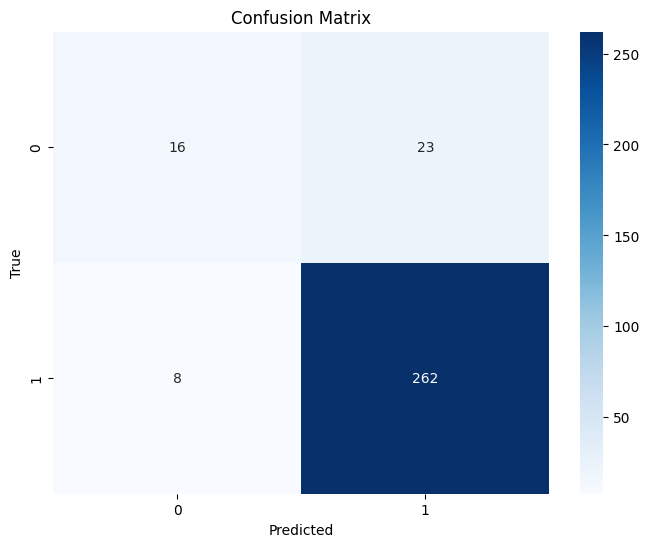

              precision    recall  f1-score   support

          NO       0.67      0.41      0.51        39
         YES       0.92      0.97      0.94       270

    accuracy                           0.90       309
   macro avg       0.79      0.69      0.73       309
weighted avg       0.89      0.90      0.89       309



In [31]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


true_labels = test_data[label_col]

cm = confusion_matrix(true_labels, predictions)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(true_labels, predictions))


In [32]:
scores = predictor.evaluate(test_data, metrics=["roc_auc"])
scores

Predicting: |          | 0/? [00:00<?, ?it/s]

{'roc_auc': 0.9450617283950618}